# INRODUCTION

#### This notebook explores the Video Game Sales dataset using Seaborn, a high-level visualization library built on Matplotlib. Our goal is to create more advanced and aesthetically pleasing statistical plots. We will generate visualizations such as a bar plot to compare sales across genres, a box plot to analyze the distribution of sales for top platforms, and a heatmap to investigate the correlation between sales in different regions. This will showcase Seaborn's ability to create insightful plots with concise code..

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')
df.dropna(inplace=True) # Drop missing values for cleaner plots


# --- Seaborn Visualizations ---

# 1. Bar Plot: Top 5 Genres by Global Sales

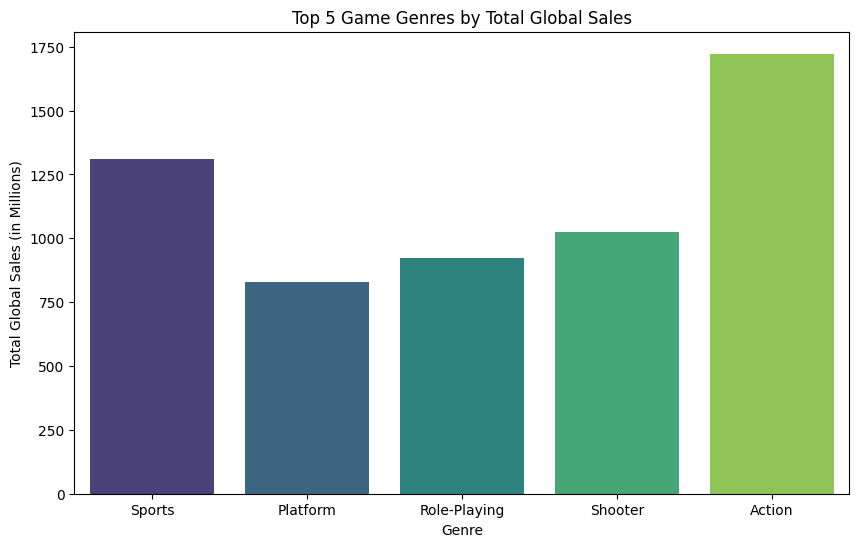

In [6]:
plt.figure(figsize=(10, 6))
top_genres = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).index[:5]
sns.barplot(x='Genre', y='Global_Sales', data=df[df['Genre'].isin(top_genres)], estimator=sum, errorbar=None, palette='viridis')
plt.title('Top 5 Game Genres by Total Global Sales')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (in Millions)')
plt.show()

# 2. Box Plot: Distribution of Global Sales by Top Platforms
# Get the top 10 platforms by number of games

In [3]:
top_platforms = df['Platform'].value_counts().nlargest(10).index

# Filter the dataframe to only include these top platforms
df_top_platforms = df[df['Platform'].isin(top_platforms)]
plt.figure(figsize=(14, 8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

# We will look at games with sales < 2 million to see the distribution better


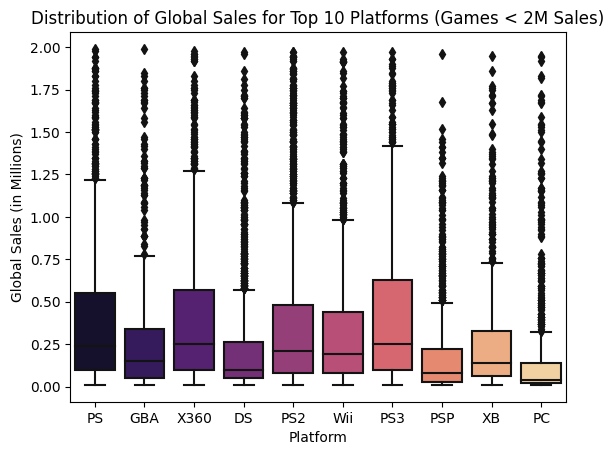

In [4]:
sns.boxplot(x='Platform', y='Global_Sales', data=df_top_platforms[df_top_platforms['Global_Sales'] < 2], palette='magma')
plt.title('Distribution of Global Sales for Top 10 Platforms (Games < 2M Sales)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in Millions)')
plt.show()

# 3. Heatmap: Correlation between Regional Sales

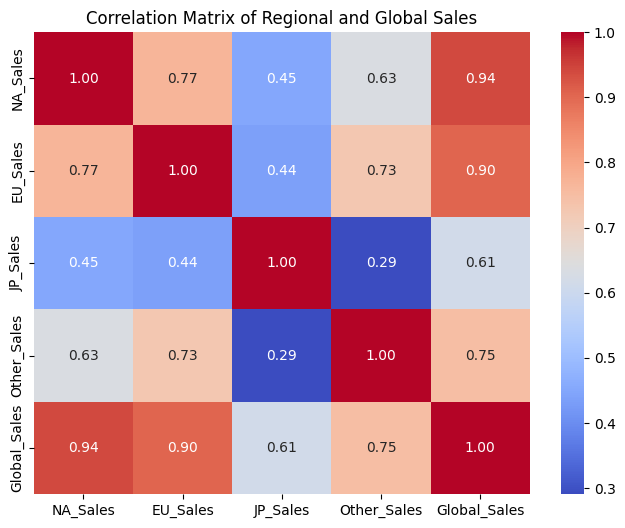

In [5]:
sales_df = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

plt.figure(figsize=(8, 6))
sns.heatmap(sales_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Regional and Global Sales')
plt.show()